In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 15, 6

In [3]:
data = pd.read_csv('/Users/laavanyaganesh/Downloads/market_sku_demand_timeline.csv', header = 0)
data.head()

,position_id,venue_closest_market_id,date,num_primary_needed,num_filled,num_reconciled_filled,num_reconciled_worked
0,1,1,2015-01-16,1,0,0,0
1,1,1,2015-01-17,1,1,1,0
2,1,1,2015-01-18,1,2,2,0
3,1,1,2015-01-19,1,2,2,0
4,1,1,2015-01-25,1,2,2,0


In [4]:
data.size

531545

## Data Preprocessing

In [5]:
print(type(data['date'][1]))
data['date'] = pd.to_datetime(data['date'])
print(type(data['date'][1]))
data.head()

<class 'str'>
<class 'pandas._libs.tslib.Timestamp'>


,position_id,venue_closest_market_id,date,num_primary_needed,num_filled,num_reconciled_filled,num_reconciled_worked
0,1,1,2015-01-16,1,0,0,0
1,1,1,2015-01-17,1,1,1,0
2,1,1,2015-01-18,1,2,2,0
3,1,1,2015-01-19,1,2,2,0
4,1,1,2015-01-25,1,2,2,0


In [6]:
rng = pd.date_range('1/1/2015', '12/31/2017',freq = 'D')
print(rng)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=1096, freq='D')


In [7]:

# dataNew = dict()
# for i in range(0, len(rng)):
#     dataNew[rng[i]] = 0
#     for j in range(0, data.shape[0]):
#         if  rng[i] == data.iloc[j].values[2]:
#             dataNew[rng[i]] += data.iloc[j].values[3]
#     print(dataNew[rng[i]], indent = 4)
# print('\n','End','\n')
# #print(dataNew)


In [11]:
dataNew1 = dict()
for i in range(0, len(rng)):
    if rng[i] not in dataNew1.keys():
        dataNew1[rng[i]] = 0

for j in range(0, data.shape[0]):
    try:
        dataNew1[data.iloc[j].values[2]] += data.iloc[j].values[3]
    except:
        continue
        
print('\n','End','\n')


 End 



2015-01-01       8
2015-01-02      14
2015-01-03      16
2015-01-04       9
2015-01-05      28
2015-01-06      20
2015-01-07      18
2015-01-08      24
2015-01-09      40
2015-01-10      29
2015-01-11     202
2015-01-12     149
2015-01-13     104
2015-01-14      28
2015-01-15      46
2015-01-16      43
2015-01-17      21
2015-01-18      11
2015-01-19      34
2015-01-20      38
2015-01-21      33
2015-01-22      34
2015-01-23      68
2015-01-24     112
2015-01-25      64
2015-01-26      49
2015-01-27      15
2015-01-28      24
2015-01-29      42
2015-01-30      50
              ... 
2017-12-02    1544
2017-12-03     754
2017-12-04     916
2017-12-05    1033
2017-12-06    1250
2017-12-07    1396
2017-12-08    1481
2017-12-09    1563
2017-12-10     699
2017-12-11     777
2017-12-12     925
2017-12-13    1020
2017-12-14    1056
2017-12-15    1186
2017-12-16    1050
2017-12-17     506
2017-12-18     508
2017-12-19     590
2017-12-20     524
2017-12-21     463
2017-12-22     320
2017-12-23  

Text(0.5,0,'DATE RANGE')

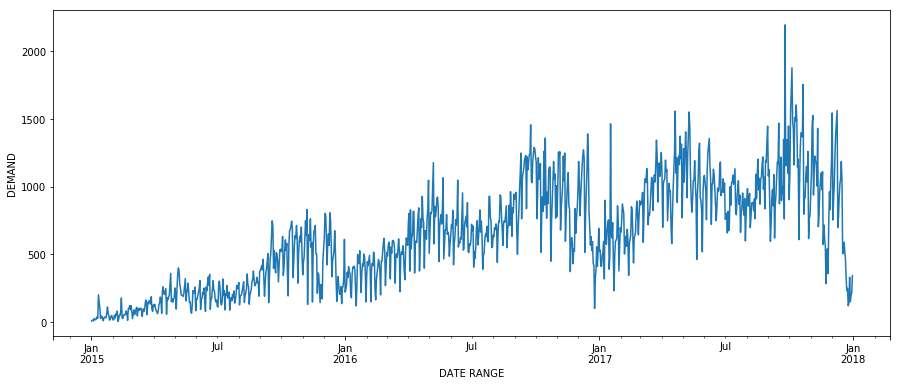

In [12]:
timeSeries = pd.Series(dataNew1)
print(timeSeries)
timeSeries.plot()
plt.ylabel('DEMAND')
plt.xlabel('DATE RANGE')

# Part 1

# Working with Daily Data

/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return f(*args, **kwds)


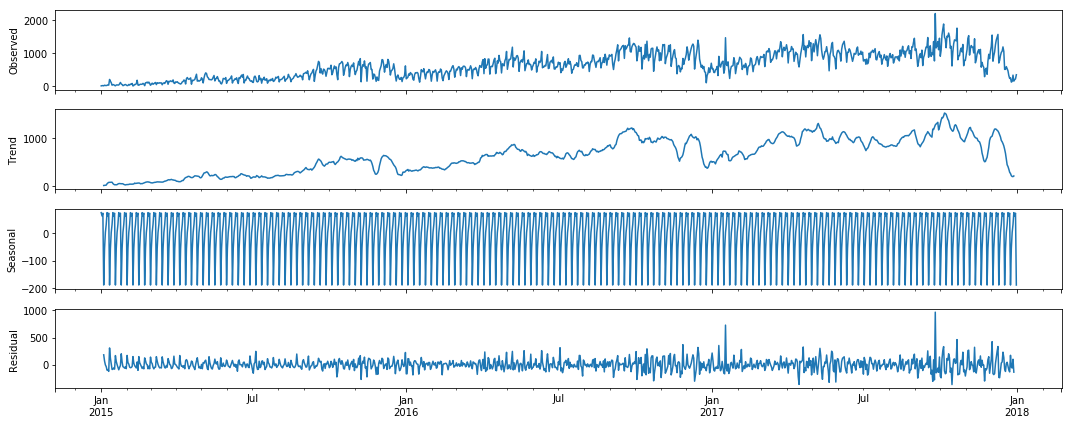

In [13]:
timeSeriesDaily = timeSeries

import statsmodels.api as sm

decomp = sm.tsa.seasonal_decompose(timeSeriesDaily)
decomp.plot()
plt.show()

## Stationarity test

In [23]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = pd.rolling_mean(timeseries, window=365)
    rolstd = pd.rolling_std(timeseries, window=365)
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=365).mean()
  after removing the cwd from sys.path.
/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=365).std()
  """


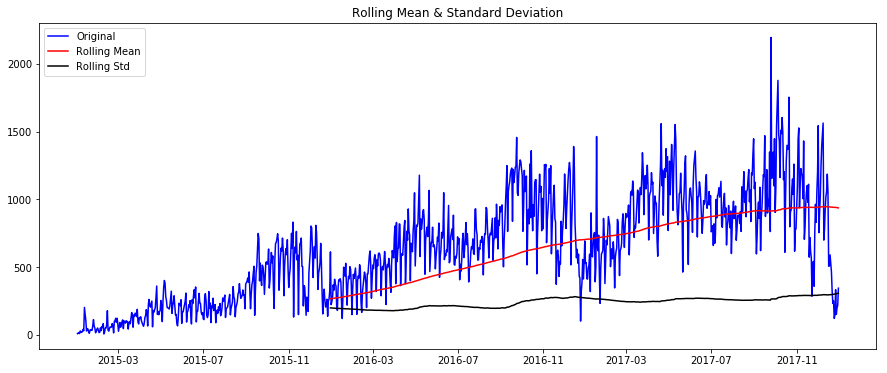

Results of Dickey-Fuller Test:
Test Statistic                   -2.239698
p-value                           0.192154
#Lags Used                       21.000000
Number of Observations Used    1074.000000
Critical Value (1%)              -3.436453
Critical Value (10%)             -2.568205
Critical Value (5%)              -2.864235
dtype: float64


In [24]:
test_stationarity(timeSeriesDaily)

### Establishing Stationarity

ADF Statistic: -5.848581
p-value: 0.000000
Critical Values:
	1%: -3.437
	10%: -2.568
	5%: -2.864


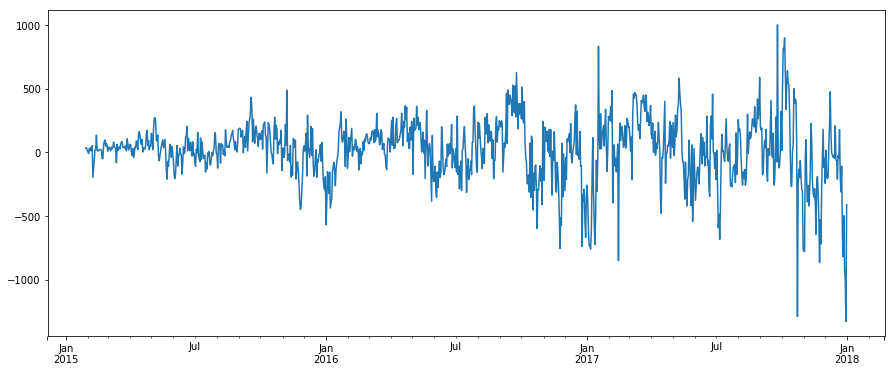

In [25]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
import pandas as pd

# difference dat
stationary = (timeSeriesDaily - timeSeriesDaily.shift(28)).dropna(inplace = False)
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# plot
stationary.plot()
pyplot.show()

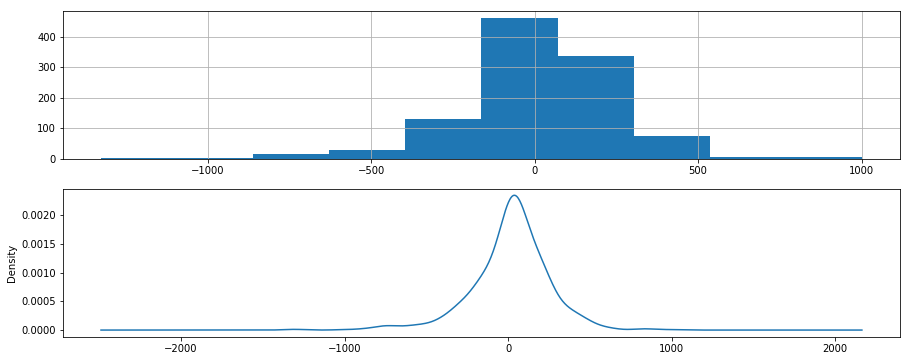

In [26]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
stationary.hist()
pyplot.subplot(212)
stationary.plot(kind='kde')
pyplot.show()

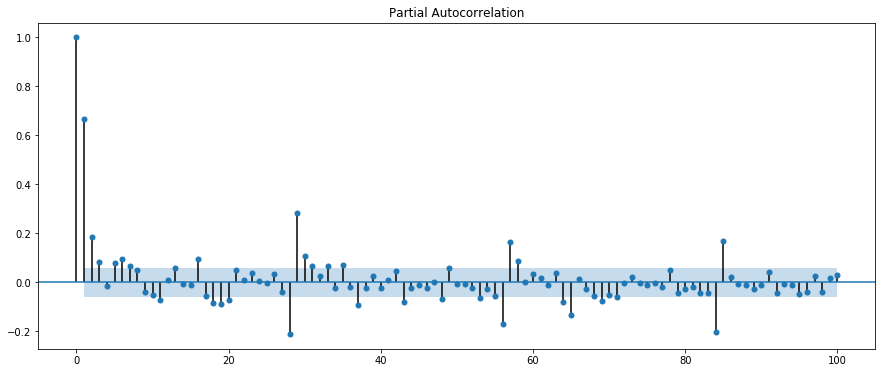

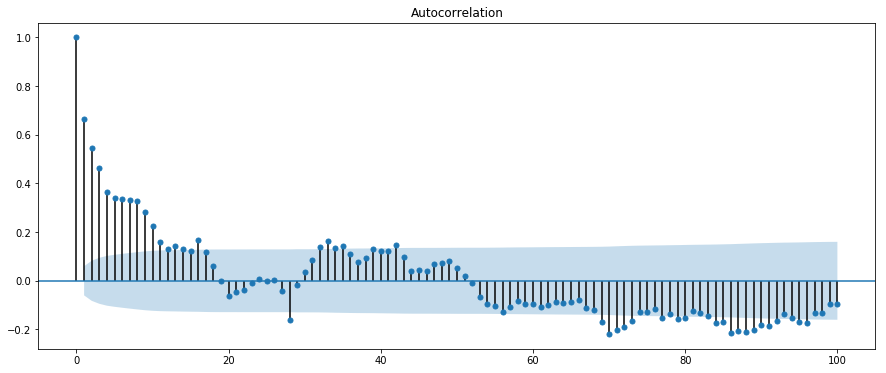

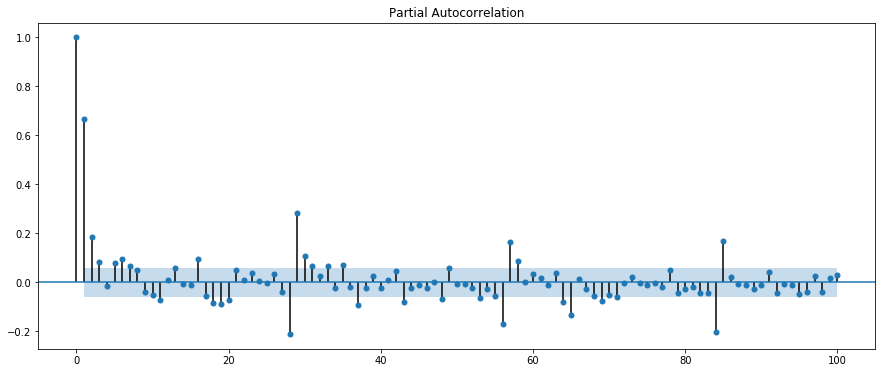

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(stationary, lags = 100)
plot_pacf(stationary, lags = 100)

/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=365).mean()
  after removing the cwd from sys.path.
/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=365).std()
  """


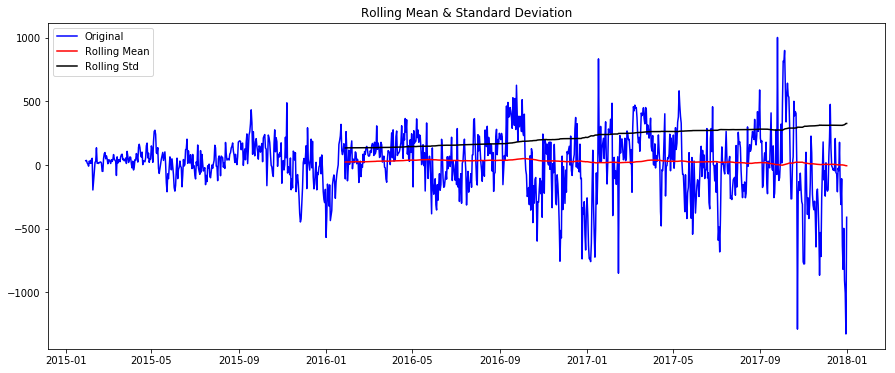

Results of Dickey-Fuller Test:
Test Statistic                -5.848581e+00
p-value                        3.634233e-07
#Lags Used                     2.000000e+01
Number of Observations Used    1.047000e+03
Critical Value (1%)           -3.436611e+00
Critical Value (10%)          -2.568242e+00
Critical Value (5%)           -2.864304e+00
dtype: float64


In [28]:
test_stationarity(stationary)

## Model

### Naive Model

In [29]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt

# prepare data
X = stationary.values
X = X
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-365]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=-82.000, Expected=-314.000
>Predicted=-130.000, Expected=-142.000
>Predicted=-6.000, Expected=-50.000
>Predicted=-25.000, Expected=-213.000
>Predicted=7.000, Expected=-142.000
>Predicted=-89.000, Expected=-132.000
>Predicted=-100.000, Expected=-68.000
>Predicted=-53.000, Expected=-175.000
>Predicted=0.000, Expected=78.000
>Predicted=-26.000, Expected=80.000
>Predicted=10.000, Expected=347.000
>Predicted=36.000, Expected=364.000
>Predicted=155.000, Expected=174.000
>Predicted=135.000, Expected=18.000
>Predicted=-9.000, Expected=-120.000
>Predicted=-11.000, Expected=-157.000
>Predicted=-123.000, Expected=238.000
>Predicted=49.000, Expected=111.000
>Predicted=71.000, Expected=227.000
>Predicted=58.000, Expected=126.000
>Predicted=-84.000, Expected=24.000
>Predicted=70.000, Expected=-38.000
>Predicted=64.000, Expected=-128.000
>Predicted=57.000, Expected=31.000
>Predicted=-17.000, Expected=28.000
>Predicted=17.000, Expected=-88.000
>Predicted=-27.000, Expected=275.000
>Predicted

In [131]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

train = (timeSeriesDaily - timeSeriesDaily.shift(365)).iloc[0:-100].dropna().astype(float).values
test = (timeSeriesDaily - timeSeriesDaily.shift(365)).iloc[-100:].astype(float).values

model = ARIMA(
    train, 
    order=(28,1,1), 
)
results = model.fit()

/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


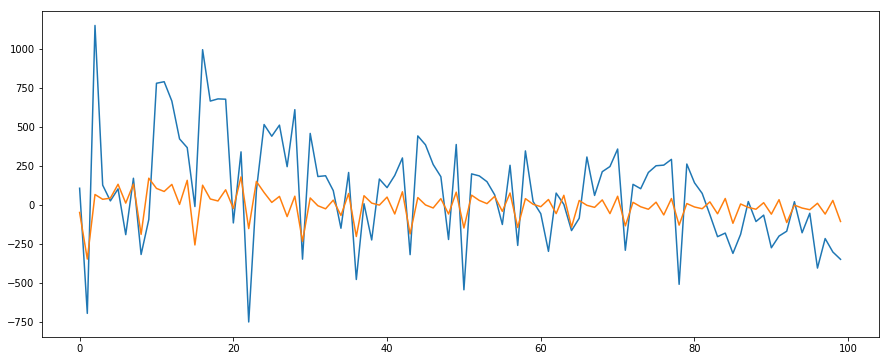

In [132]:
plt.plot(test)
plt.plot(results.forecast(100)[0])

In [117]:
np.abs((timeSeriesDaily.iloc[-100:].astype(float).values - results.forecast(100, exog=np.concatenate(
        [
            np.expand_dims(timeSeriesDaily.shift(365).fillna(0).iloc[-100:].astype(float).values, 1),
            np.expand_dims(timeSeriesDaily.shift(365).fillna(0).iloc[-100:].astype(float).values, 1)
        ], axis=1)
)[0])).mean()

295.93852775732643

### ARIMA Model

In [30]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# prepare data
X = stationary.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,0,2))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, 365)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=-127.926, Expected=-314.000
>Predicted=-277.426, Expected=-142.000
>Predicted=-80.742, Expected=-50.000
>Predicted=-11.799, Expected=-213.000
>Predicted=-92.705, Expected=-142.000
>Predicted=-173.366, Expected=-132.000
>Predicted=-134.419, Expected=-68.000
>Predicted=-82.447, Expected=-175.000
>Predicted=-78.615, Expected=78.000
>Predicted=6.049, Expected=80.000
>Predicted=77.152, Expected=347.000
>Predicted=181.617, Expected=364.000
>Predicted=339.913, Expected=174.000
>Predicted=192.837, Expected=18.000
>Predicted=-31.170, Expected=-120.000
>Predicted=-69.431, Expected=-157.000
>Predicted=-198.771, Expected=238.000
>Predicted=170.006, Expected=111.000
>Predicted=157.189, Expected=227.000
>Predicted=121.218, Expected=126.000
>Predicted=-13.458, Expected=24.000
>Predicted=66.280, Expected=-38.000
>Predicted=34.133, Expected=-128.000
>Predicted=0.375, Expected=31.000
>Predicted=-4.297, Expected=28.000
>Predicted=49.976, Expected=-88.000
>Predicted=-79.920, Expected=275.000
>P

>Predicted=174.307, Expected=11.000
>Predicted=88.354, Expected=121.000
>Predicted=195.222, Expected=-214.000
>Predicted=96.549, Expected=289.000
>Predicted=234.316, Expected=458.000
>Predicted=355.300, Expected=425.000
>Predicted=360.660, Expected=470.000
>Predicted=259.901, Expected=449.000
>Predicted=324.124, Expected=451.000
>Predicted=500.462, Expected=373.000
>Predicted=278.866, Expected=233.000
>Predicted=264.872, Expected=174.000
>Predicted=204.659, Expected=217.000
>Predicted=155.405, Expected=108.000
>Predicted=127.730, Expected=239.000
>Predicted=264.851, Expected=408.000
>Predicted=362.437, Expected=388.000
>Predicted=208.788, Expected=400.000
>Predicted=193.200, Expected=449.000
>Predicted=272.739, Expected=363.000
>Predicted=149.642, Expected=323.000
>Predicted=100.914, Expected=451.000
>Predicted=91.312, Expected=441.000
>Predicted=81.894, Expected=242.000
>Predicted=131.940, Expected=315.000
>Predicted=225.619, Expected=280.000
>Predicted=257.782, Expected=211.000
>Pred

>Predicted=-23.238, Expected=7.000
>Predicted=-424.654, Expected=63.000
>Predicted=-109.985, Expected=500.000
>Predicted=-73.868, Expected=386.000
>Predicted=97.069, Expected=419.000
>Predicted=50.657, Expected=405.000
>Predicted=-125.757, Expected=35.000
>Predicted=-593.730, Expected=-1288.000
>Predicted=-971.561, Expected=-233.000
>Predicted=-457.519, Expected=-131.000
>Predicted=-48.546, Expected=-198.000
>Predicted=-258.220, Expected=-64.000
>Predicted=-272.778, Expected=-188.000
>Predicted=-168.965, Expected=-287.000
>Predicted=-566.454, Expected=-309.000
>Predicted=101.817, Expected=-760.000
>Predicted=-494.690, Expected=-777.000
>Predicted=-605.874, Expected=-775.000
>Predicted=-114.197, Expected=-35.000
>Predicted=192.147, Expected=100.000
>Predicted=200.889, Expected=-222.000
>Predicted=18.936, Expected=-388.000
>Predicted=-191.852, Expected=-258.000
>Predicted=-89.667, Expected=-420.000
>Predicted=4.179, Expected=-316.000
>Predicted=-196.003, Expected=-140.000
>Predicted=151.

### Grid Search

In [ ]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, 365)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = stationary
# evaluate parameters
p_values = [0,1,2,3,4,5,6]
d_values = [0,1,2]
q_values = [0,1,2,3,4,5,6]
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

### Post Grid Search Model Application

/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                0
count  534.000000
mean   -27.695430
std    265.585187
min   -920.871852
25%   -181.172076
50%    -31.845308
75%    123.046949
max    919.622118


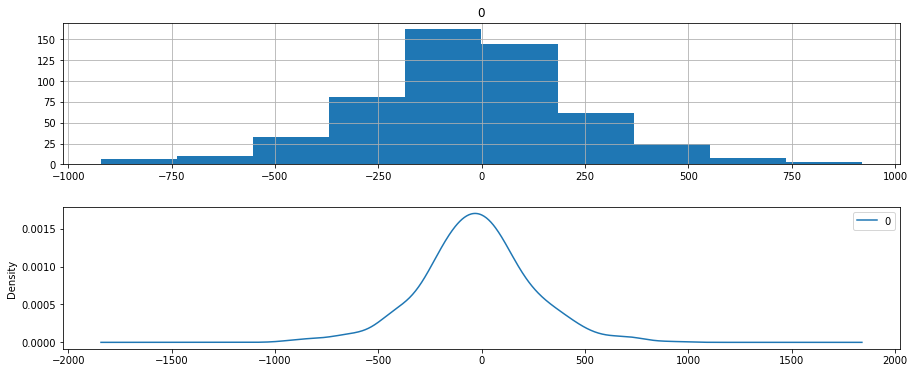

In [31]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# prepare data
X = stationary.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,0,3))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, 365)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RMSE: 265.336
                  0
count  5.340000e+02
mean   3.838897e-07
std    2.655852e+02
min   -8.931764e+02
25%   -1.534766e+02
50%   -4.149878e+00
75%    1.507424e+02
max    9.473175e+02


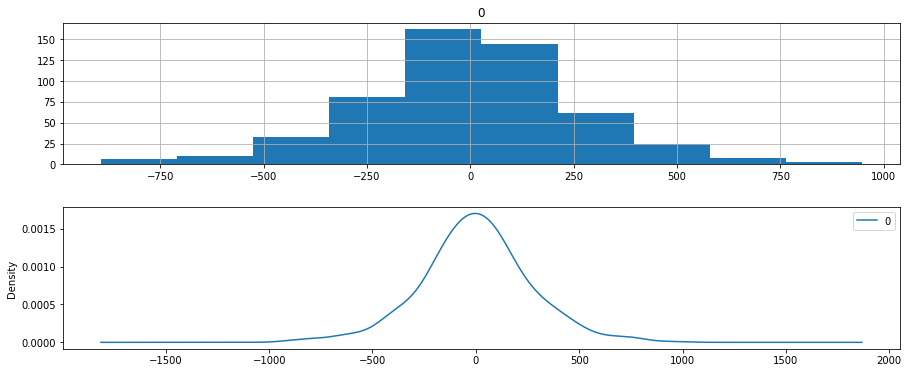

In [32]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# prepare data
X = stationary.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = -27.695430
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,0,3))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, 365)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                0
count  534.000000
mean   -27.695430
std    265.585187
min   -920.871852
25%   -181.172076
50%    -31.845308
75%    123.046949
max    919.622118


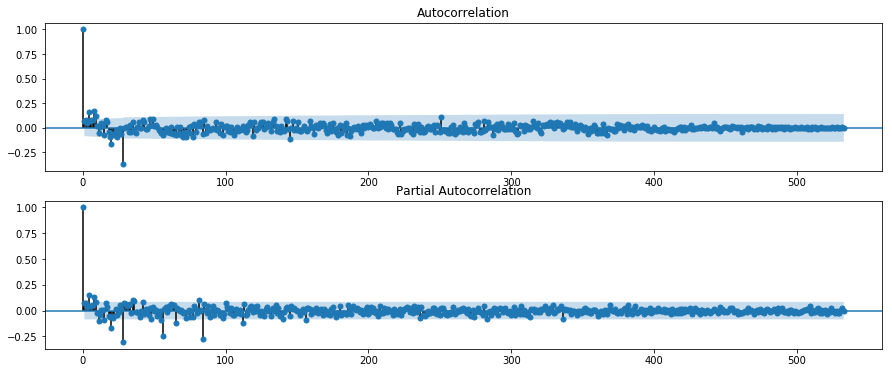

In [33]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

X = stationary.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,0,3))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, 365)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

### Saving Model And Forescasting

In [34]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy
 
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__

# prepare data
X = stationary.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=(0,0,3))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = -27.695430
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

In [35]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(stationary.values, yhat, 365)
print('Predicted: %.3f' % yhat)

Predicted: -551.964


>Predicted=-375.964, Expected=-314
>Predicted=-330.835, Expected=-142.000
>Predicted=-139.065, Expected=-50.000
>Predicted=-82.404, Expected=-213.000
>Predicted=-78.504, Expected=-142.000
>Predicted=-206.598, Expected=-132.000
>Predicted=-220.554, Expected=-68.000
>Predicted=-103.812, Expected=-175.000
>Predicted=-99.846, Expected=78.000
>Predicted=-31.582, Expected=80.000
>Predicted=24.885, Expected=347.000
>Predicted=206.052, Expected=364.000
>Predicted=327.619, Expected=174.000
>Predicted=226.479, Expected=18.000
>Predicted=-54.816, Expected=-120.000
>Predicted=-129.691, Expected=-157.000
>Predicted=-242.849, Expected=238.000
>Predicted=131.121, Expected=111.000
>Predicted=147.535, Expected=227.000
>Predicted=166.717, Expected=126.000
>Predicted=-71.942, Expected=24.000
>Predicted=59.660, Expected=-38.000
>Predicted=1.691, Expected=-128.000
>Predicted=-39.313, Expected=31.000
>Predicted=-44.417, Expected=28.000
>Predicted=16.784, Expected=-88.000
>Predicted=-76.064, Expected=275.000

>Predicted=100.705, Expected=210.000
>Predicted=144.116, Expected=34.000
>Predicted=153.150, Expected=45.000
>Predicted=151.504, Expected=267.000
>Predicted=187.479, Expected=248.000
>Predicted=203.918, Expected=199.000
>Predicted=182.957, Expected=202.000
>Predicted=132.965, Expected=123.000
>Predicted=134.842, Expected=11.000
>Predicted=81.368, Expected=121.000
>Predicted=173.291, Expected=-214.000
>Predicted=45.745, Expected=289.000
>Predicted=246.945, Expected=458.000
>Predicted=268.825, Expected=425.000
>Predicted=477.388, Expected=470.000
>Predicted=296.004, Expected=449.000
>Predicted=292.280, Expected=451.000
>Predicted=512.153, Expected=373.000
>Predicted=311.049, Expected=233.000
>Predicted=273.632, Expected=174.000
>Predicted=183.744, Expected=217.000
>Predicted=124.295, Expected=108.000
>Predicted=119.646, Expected=239.000
>Predicted=277.877, Expected=408.000
>Predicted=329.798, Expected=388.000
>Predicted=236.728, Expected=400.000
>Predicted=236.679, Expected=449.000
>Pred

/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=-285.606, Expected=17.000
>Predicted=274.427, Expected=-310.000
>Predicted=-375.281, Expected=-591.000
>Predicted=-415.937, Expected=-486.000
>Predicted=-659.197, Expected=-682.000
>Predicted=-546.002, Expected=-427.000
>Predicted=-311.967, Expected=-56.000
>Predicted=-374.652, Expected=142.000
>Predicted=118.610, Expected=9.000
>Predicted=59.404, Expected=13.000
>Predicted=95.780, Expected=-44.000
>Predicted=105.962, Expected=-70.000
>Predicted=-0.756, Expected=91.000
>Predicted=-27.773, Expected=264.000
>Predicted=-192.479, Expected=59.000
>Predicted=-98.466, Expected=-54.000
>Predicted=-107.385, Expected=-70.000
>Predicted=-333.494, Expected=32.000
>Predicted=-160.637, Expected=67.000
>Predicted=-97.222, Expected=-263.000
>Predicted=-196.718, Expected=-246.000
>Predicted=-376.276, Expected=-271.000
>Predicted=-146.643, Expected=-180.000
>Predicted=-17.550, Expected=-116.000
>Predicted=274.188, Expected=-104.000
>Predicted=295.218, Expected=-97.000
>Predicted=83.392, Expec

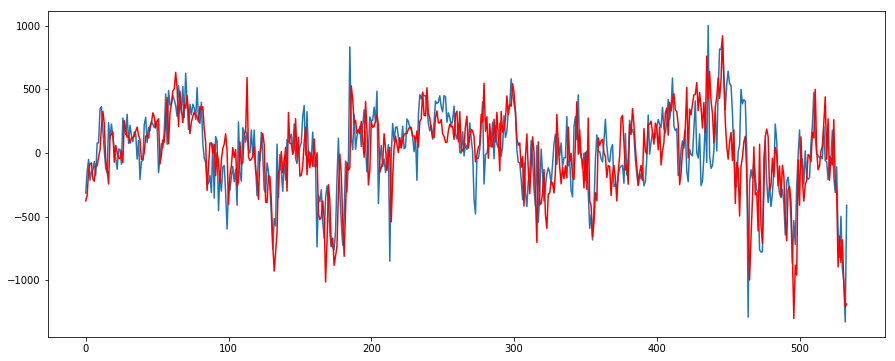

In [36]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# load and prepare datasets
X = stationary.values.astype('float32')
trainSize = int(len(X) * 0.5)
train, test = X[:trainSize],X[trainSize:]
history = [x for x in train]
validation = test
y = validation
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, 365)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(0,0,3))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, 365)
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

## Forecasting to future periods

In [37]:
predRng = pd.date_range('1/1/2018', '05/31/2018',freq = 'D')
print(predRng)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25',
               '2018-05-26', '2018-05-27', '2018-05-28', '2018-05-29',
               '2018-05-30', '2018-05-31'],
              dtype='datetime64[ns]', length=151, freq='D')


In [40]:
model_fit.forecast()

(-519.49737943101627,
 array([ 199.10532857]),
 array([[-909.73665255, -129.25810631]]))

2018-01-01     233.036297
2018-01-02     281.438531
2018-01-03     166.502443
2018-01-04    -208.684134
2018-01-05    -326.180557
2018-01-06    -427.032528
2018-01-07    -409.100361
2018-01-08    -634.338305
2018-01-09     232.180867
2018-01-10     379.678909
2018-01-11     328.223551
2018-01-12     188.652495
2018-01-13     -90.976332
2018-01-14     -93.312083
2018-01-15    -152.069974
2018-01-16      78.053249
2018-01-17    1202.097173
2018-01-18     959.992048
2018-01-19     984.480725
2018-01-20     995.169349
2018-01-21     612.539816
2018-01-22     327.755611
2018-01-23     614.862860
2018-01-24     703.304846
2018-01-25     785.297964
2018-01-26     737.341682
2018-01-27    1009.115593
2018-01-28     989.982879
2018-01-29     560.860792
2018-01-30     517.194347
                 ...     
2018-05-02    1344.806052
2018-05-03    1160.719527
2018-05-04    1288.746479
2018-05-05    1434.201141
2018-05-06    1383.862590
2018-05-07    1090.406312
2018-05-08    1433.263526
2018-05-09  

"\nfig = pyplot.figure()\n\nfig.add_subplot(211)\npyplot.plot(stationary)\npyplot.plot(predictedTimeSeriesStationary, color = 'red')\n\nfig.add_subplot(212)\npyplot.plot(timeSeriesWeekly)\npyplot.plot(predictedTimeSeries, color = 'red')\n"

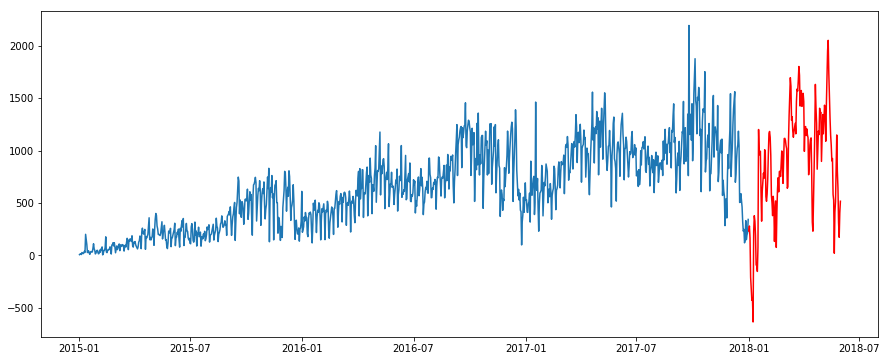

In [38]:
Y = timeSeriesDaily.values
actuals = [y for y in Y]
#print('\n', actuals, '\n')
stationary = (timeSeriesDaily - timeSeriesDaily.shift(365)).dropna(inplace = False)
X = stationary.values

history = [x for x in X]
#print(history)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

bias = -27.695430
#print('\n', bias, '\n')

predictionsActual = list()
predictionsStationary = list()

for i in range(1, len(predRng)+1):
    # predict
    model = ARIMA(history, order=(0,0,3))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    
    yhat1 = bias + inverse_difference(history, yhat, interval=365)
    history.append(yhat1)
    predictionsStationary.append(yhat1)

    yhat = bias + inverse_difference(actuals, yhat, interval=365)
    predictionsActual.append(yhat)
    actuals.append(yhat)

predictedTimeSeries = pd.Series(predictionsActual, index = predRng)
predictedTimeSeriesStationary = pd.Series(predictionsStationary, index = predRng)

print(predictedTimeSeries)

pyplot.plot(timeSeriesDaily)
pyplot.plot(predictedTimeSeries, color = 'red')

'''
fig = pyplot.figure()

fig.add_subplot(211)
pyplot.plot(stationary)
pyplot.plot(predictedTimeSeriesStationary, color = 'red')

fig.add_subplot(212)
pyplot.plot(timeSeriesWeekly)
pyplot.plot(predictedTimeSeries, color = 'red')
'''

# Part 2

# Working with Monthly Data

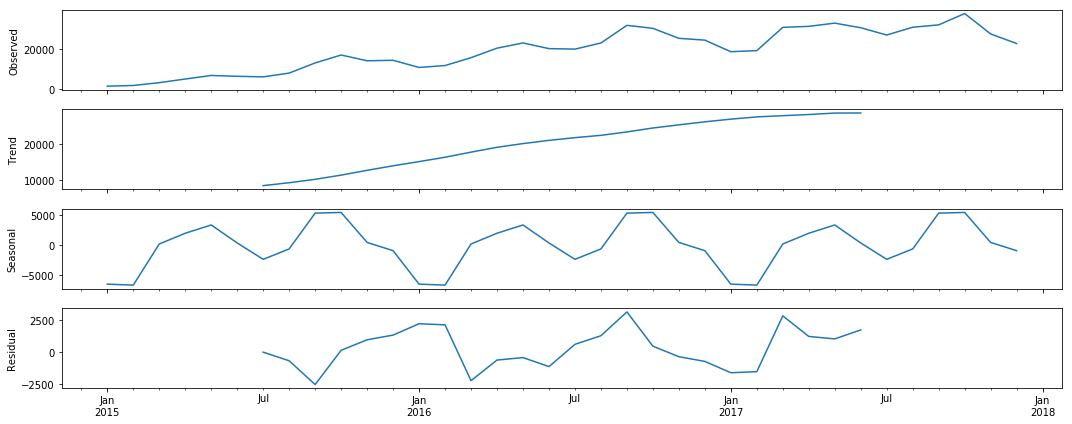

In [28]:
timeSeriesMonthly = timeSeries.resample('M').sum()

import statsmodels.api as sm

decomp = sm.tsa.seasonal_decompose(timeSeriesMonthly)
decomp.plot()
plt.show()

## Stationarity Test

In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


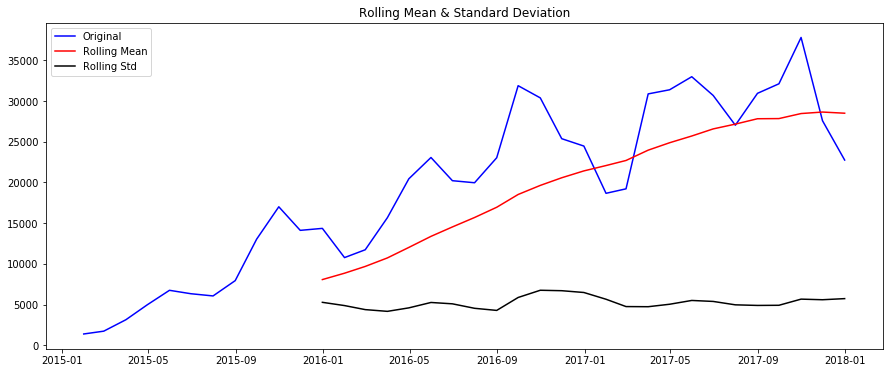

Results of Dickey-Fuller Test:
Test Statistic                 -2.456359
p-value                         0.126457
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
Critical Value (1%)            -3.723863
dtype: float64


In [30]:
test_stationarity(timeSeriesMonthly)

### Establishing Stationarity

ADF Statistic: -2.578354
p-value: 0.097554
Critical Values:
	5%: -3.005
	10%: -2.643
	1%: -3.770


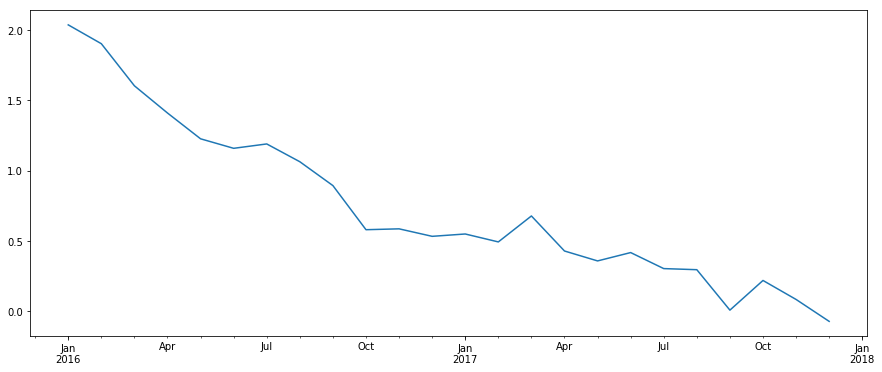

In [31]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
import pandas as pd

# difference dat
tsLog = np.log(timeSeriesMonthly)
stationary = (tsLog - tsLog.shift(12)).dropna(inplace = False)
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# plot
stationary.plot()
pyplot.show()

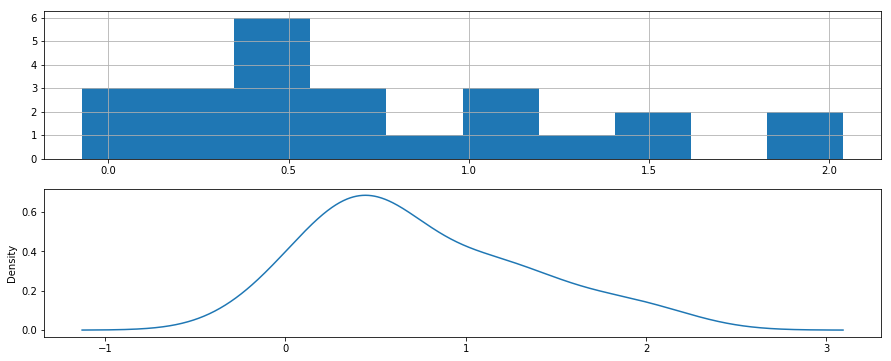

In [32]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
stationary.hist()
pyplot.subplot(212)
stationary.plot(kind='kde')
pyplot.show()

/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/Users/laavanyaganesh/repo/scratchbook/venv/lib/python3.4/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


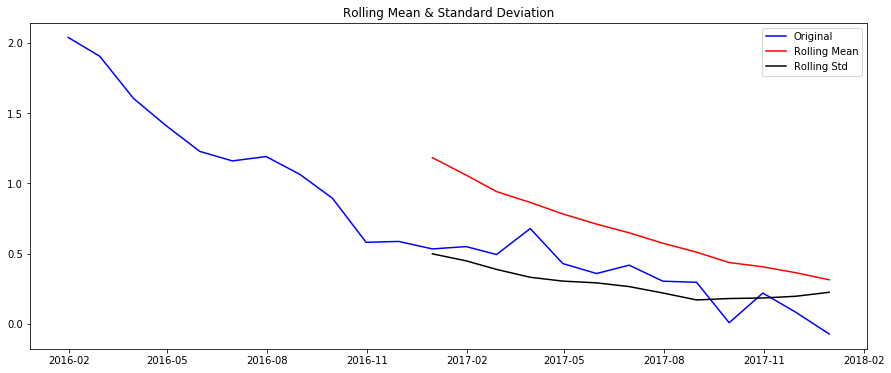

Results of Dickey-Fuller Test:
Test Statistic                 -2.578354
p-value                         0.097554
#Lags Used                      1.000000
Number of Observations Used    22.000000
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
Critical Value (1%)            -3.769733
dtype: float64


In [33]:
test_stationarity(stationary)

## Model

### Naive Model

In [34]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt

# prepare data
X = stationary.values
X = X
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-12]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=2.038, Expected=0.549
>Predicted=1.903, Expected=0.493
>Predicted=1.604, Expected=0.677
>Predicted=1.410, Expected=0.428
>Predicted=1.227, Expected=0.358
>Predicted=1.159, Expected=0.417
>Predicted=1.190, Expected=0.303
>Predicted=1.063, Expected=0.295
>Predicted=0.894, Expected=0.007
>Predicted=0.580, Expected=0.218
>Predicted=0.586, Expected=0.083
>Predicted=0.533, Expected=-0.073
RMSE: 0.924


### Arima Model

In [35]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# prepare data
X = stationary.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,0,2))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, 12)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

## Grid Search

## Post Grid Search Model Application

In [ ]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# prepare data
X = stationary.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,0,2))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, 12)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [ ]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# prepare data
X = stationary.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = -0.912548
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,0,2))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, 12)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [ ]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

X = stationary.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,0,2))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, 12)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

## Saving Model and Forecasting

In [ ]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy
 
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__

# prepare data
X = stationary.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=(0,0,2))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = -0.912548
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

In [ ]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(stationary.values, yhat, 12)
print('Predicted: %.3f' % yhat)

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# load and prepare datasets
X = stationary.values.astype('float32')
trainSize = int(len(X) * 0.5)
train, test = X[:trainSize],X[trainSize:]
history = [x for x in train]
validation = test
y = validation
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, 12)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(0,0,2))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, 12)
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

## Forecasting to future periods

In [ ]:
predRng = pd.date_range('1/1/2018', '12/31/2018',freq = 'M')
print(predRng)

In [ ]:
Y = tsLog.values
actuals = [y for y in Y]
#print('\n', actuals, '\n')
X = stationary.values
history = [x for x in X]
#print(history)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

bias = -0.912548
#print('\n', bias, '\n')

predictionsActual = list()
predictionsStationary = list()

for i in range(1, len(predRng)+1):
    # predict
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    
    yhat1 = bias + inverse_difference(history, yhat, interval=12)
    history.append(yhat1)
    predictionsStationary.append(yhat1)

    yhat = bias + inverse_difference(actuals, yhat, interval=12)
    predictionsActual.append(yhat)
    actuals.append(yhat)

predictions = np.exp(predictionsActual)
predictedTS = pd.Series(predictions, index = predRng)

predictedTimeSeries = pd.Series(predictionsActual, index = predRng)
predictedTimeSeriesStationary = pd.Series(predictionsStationary, index = predRng)

print(predictedTimeSeries)

pyplot.plot(timeSeriesMonthly)
pyplot.plot(predictedTS, color = 'red')

'''
fig = pyplot.figure()

fig.add_subplot(211)
pyplot.plot(stationary)
pyplot.plot(predictedTimeSeriesStationary, color = 'red')

fig.add_subplot(212)
pyplot.plot(timeSeriesWeekly)
pyplot.plot(predictedTimeSeries, color = 'red')
'''

# Part 3

# Working with Weekly Data

In [ ]:
timeSeriesWeekly = timeSeries.resample('W-FRI').sum()

import statsmodels.api as sm

decomp = sm.tsa.seasonal_decompose(timeSeriesWeekly)
decomp.plot()
plt.show()